# Exploratory Data Analysis

The main goal of this little project is to make an exploratory data analysis (EDA) of the fictional StudentsPerformance dataset (https://www.kaggle.com/spscientist/students-performance-in-exams). The data set includes scores from three exams and a variety of personal, social, and economical factors that have interaction effects upon them.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns

In [2]:
# Import dataset
df = pd.read_csv("data/StudentsPerformance.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 43.0+ KB


The dataset has 1000 rows and 8 variables, 5 categoricals and 3 numericals. None of the variables have null values. 

# Target Variables

## Math, Writing and Reading Scores

In [3]:
df.describe()[1:]

,math score,reading score,writing score
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


While the three scores have a similar mean (65-70) and a maximum of 100 points, the only subject where a student has obtained a 0 is math. Their distributions are very similar, having aproximately a 25% of the scores below the 60 points. So, more than 75% of the students of each subject have passed the exam. However, observing math's percentiles we can see that getting a higher score is a little bit more difficult. Let's take a look at some graphs about these scores:

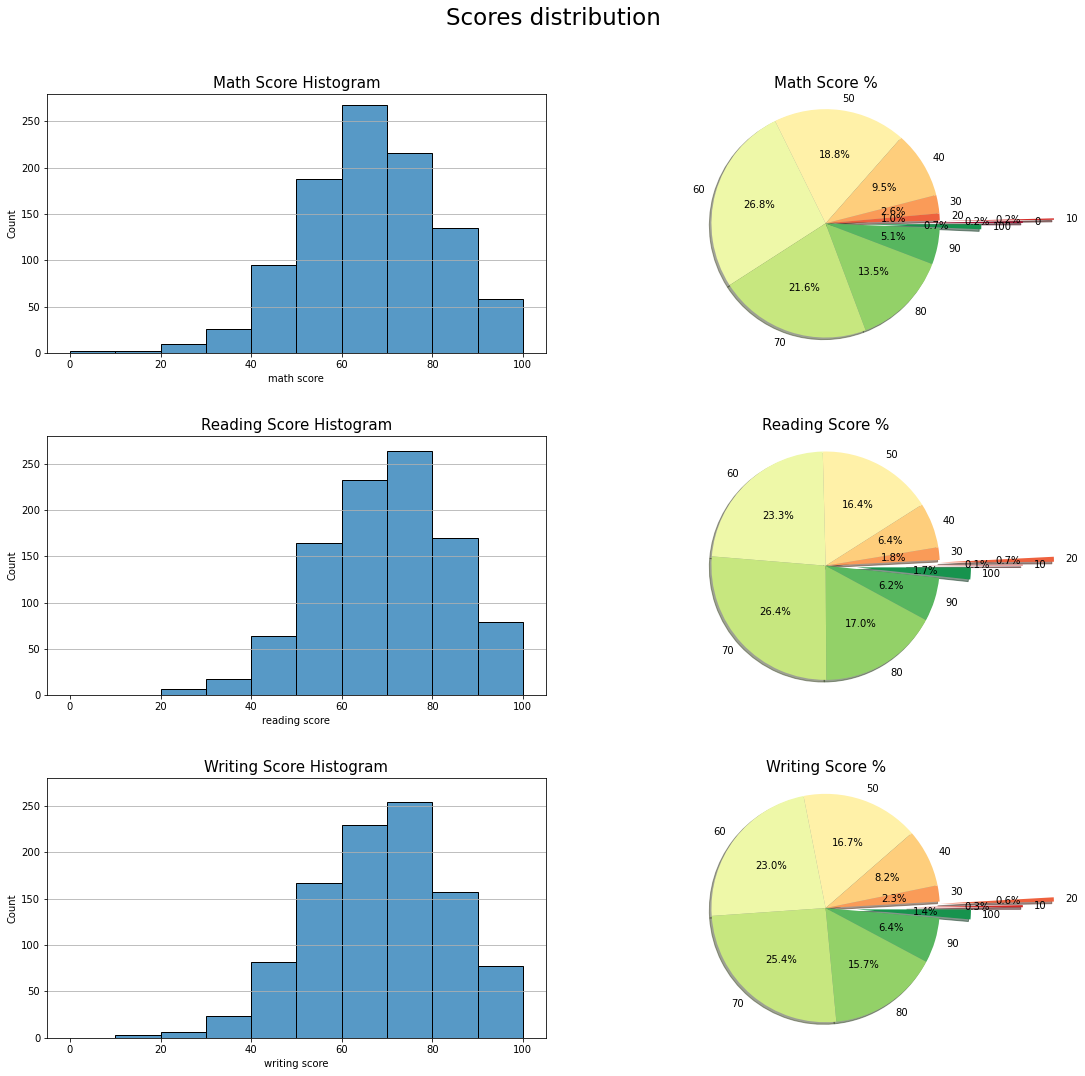

In [4]:
# Create figure
fig, axs = plt.subplots(3,2, figsize=(15,15))
ax1, ax2, ax3, ax4, ax5, ax6 = axs.flatten()
fig.tight_layout(w_pad=0, h_pad=7)
fig.suptitle('Scores distribution', size=23)
plt.subplots_adjust(top=0.9)

# Histogram plots
sns.histplot(data=df, x='math score', binrange=(0,100), bins=10, ax=ax1)
ax1.set_ylim(0,280)
ax1.set_title('Math Score Histogram', size=15)
ax1.grid(b=True, which='major', axis='y')

sns.histplot(data=df, x='reading score', binrange=(0,100), bins=10, ax=ax3)
ax3.set_xlim(-5,105)
ax3.set_ylim(0,280)
ax3.set_title('Reading Score Histogram', size=15)
ax3.grid(b=True, which='major', axis='y')

sns.histplot(data=df, x='writing score', binrange=(0,100), bins=10, ax=ax5)
ax5.set_xlim(-5,105)
ax5.set_ylim(0,280)
ax5.set_title('Writing Score Histogram', size=15)
ax5.grid(b=True, which='major', axis='y')


# Pie plots
# Convert int scores in range [0-100] to range [0-10]
math_10 =(df['math score']/10).astype(int)*10
read_10 =(df['reading score']/10).astype(int)*10
writ_10 =(df['writing score']/10).astype(int)*10

# Select labels and math score
math_sorted = math_10.value_counts().reset_index().sort_values('index')
read_sorted = read_10.value_counts().reset_index().sort_values('index')
writing_sorted = writ_10.value_counts().reset_index().sort_values('index')

# Select pie colors
theme = plt.get_cmap('RdYlGn')
ax2.set_prop_cycle("color", [theme(1. * i / len(math_10.unique())) for i in range(len(math_10.unique()))])
ax4.set_prop_cycle("color", [theme(1. * i / len(math_10.unique())) for i in range(len(math_10.unique()))][1:])
ax6.set_prop_cycle("color", [theme(1. * i / len(math_10.unique())) for i in range(len(math_10.unique()))][1:])

# Pie plots
ax2.pie(math_sorted ['math score'], radius=1.1, autopct='%1.1f%%', shadow=True,
        labels=math_sorted['index'], explode=[0.8,1.1,0,0,0,0,0,0,0,0,0.4])
ax2.set_title('Math Score %', size=15, y=1)

ax4.pie(read_sorted ['reading score'], radius=1.1, autopct='%1.1f%%', shadow=True,
        labels=read_sorted['index'],  explode=[0.8,1.1,0,0,0,0,0,0,0,0.3])
ax4.set_title('Reading Score %', size=15, y=1)

ax6.pie(writing_sorted ['writing score'], radius=1.1, autopct='%1.1f%%', shadow=True,
        labels=writing_sorted['index'],  explode=[0.8,1.1,0,0,0,0,0,0,0,0.3])
ax6.set_title('Writing Score %', size=15, y=1)

plt.show()

On the one hand, we have Math Score variable, which tends to have the lowest values. Its minimum score is 0 and a 13% of the students didn't pass the exam. Although an 87% passed the exam, only a 40% of all the students achieved a score of 70 or higher, and the top scores (90-100) only represented a 6% of all the students.  

On the other hand, Reading and Writing Score variables have a more similar behaviour. Neither has a minimum score of 0, as they begin at 17 and 10 points respectively, and they only have a 9% and a 11% of students who didn't pass the exam. Where these features have the major similarities, is in the marks above 70 points. In both, aproximately 50% of the students achieved a score of 70 or higher and the top scores (90-100) represented 8% of the exams. 

Thus, it is harder to obtain a good mark in Math than in Reading and Writing.

## Correlation between scores

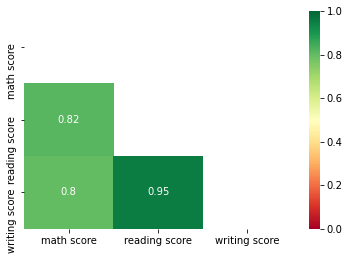

In [5]:
mask = np.triu(np.ones_like(df.corr())) 
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=0, vmax=1, annot=True, cmap="RdYlGn") 

As we can observe on the heatmap, the three variables are **highly positively correlated**. This makes sense, as usually students with good performance on one subject also have good marks on the others. However, what needs to be highlighted on this graphic is the almost complete positive correlation between the writing and the reading score variables. One possible explanation for this phenomenon is that both require similar skills, thus a student with a low level in reading is highly improbable that can obtain a good mark in writing. 

# Categorical variables

## Gender

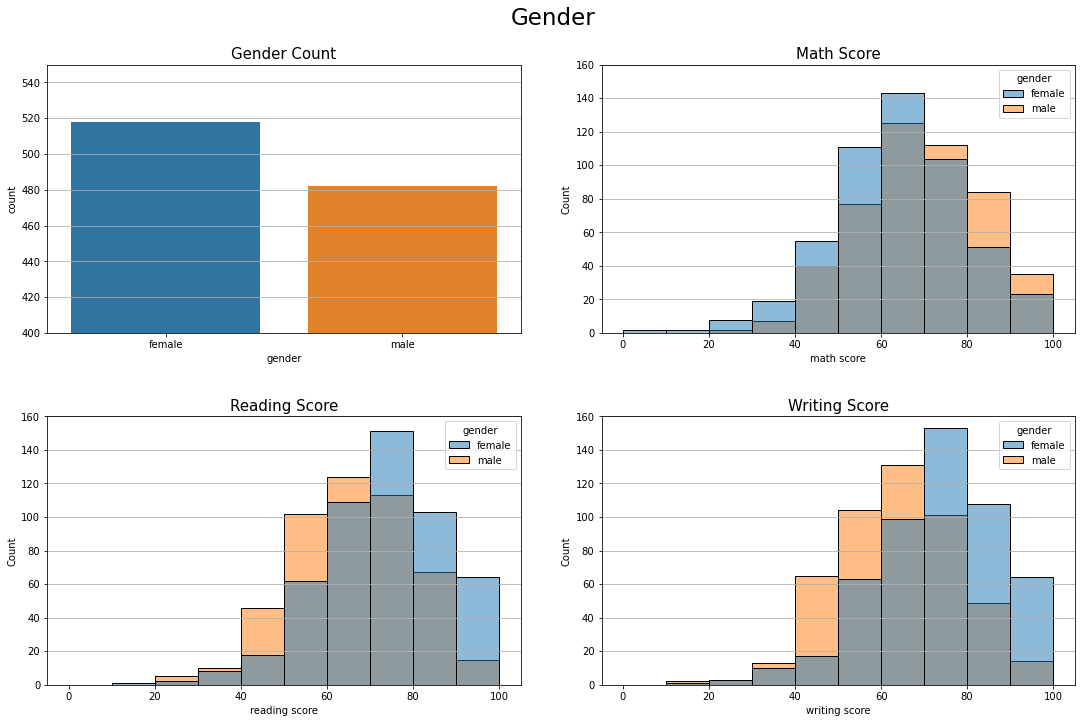

In [6]:
# Create figure
fig, axs = plt.subplots(2,2, figsize=(15,10))
ax1, ax2, ax3, ax4 = axs.flatten()
fig.tight_layout(w_pad=5, h_pad=7)
fig.suptitle('Gender', size=23)
plt.subplots_adjust(top=0.9)

# Gender Countplot
sns.countplot(data=df, x='gender', ax=ax1);
ax1.grid(b=True, which='major', axis='y')
ax1.set_ylim(400,550)
ax1.set_title('Gender Count', size=15)

# Math histogram
sns.histplot(data=df, x='math score', binrange=(0,100), bins=10, hue='gender', ax=ax2)
ax2.set_title('Math Score', size=15)
ax2.grid(b=True, which='major', axis='y')
ax2.set_ylim(0,160)

# Reading histogram
sns.histplot(data=df, x='reading score', binrange=(0,100), bins=10, hue='gender', ax=ax3)
ax3.set_title('Reading Score', size=15)
ax3.grid(b=True, which='major', axis='y')
ax3.set_ylim(0,160)

# Writing histogram
sns.histplot(data=df, x='writing score', binrange=(0,100), bins=10, hue='gender', ax=ax4)
ax4.set_title('Writing Score', size=15)
ax4.grid(b=True, which='major', axis='y')
ax4.set_ylim(0,160)

plt.show()

Each group is composed of around 500 students, these similar numbers allow to make some comparisons between the different distributions.

Clearly, female students have a better performance on the Reading and Writing scores, as they obtain the majority of 70 points or higher on these subjects. However, although they still have a big percentage of the Math Scores, which are higher than 70 points, male students represent the majority of this marks. 

## Ethnicity

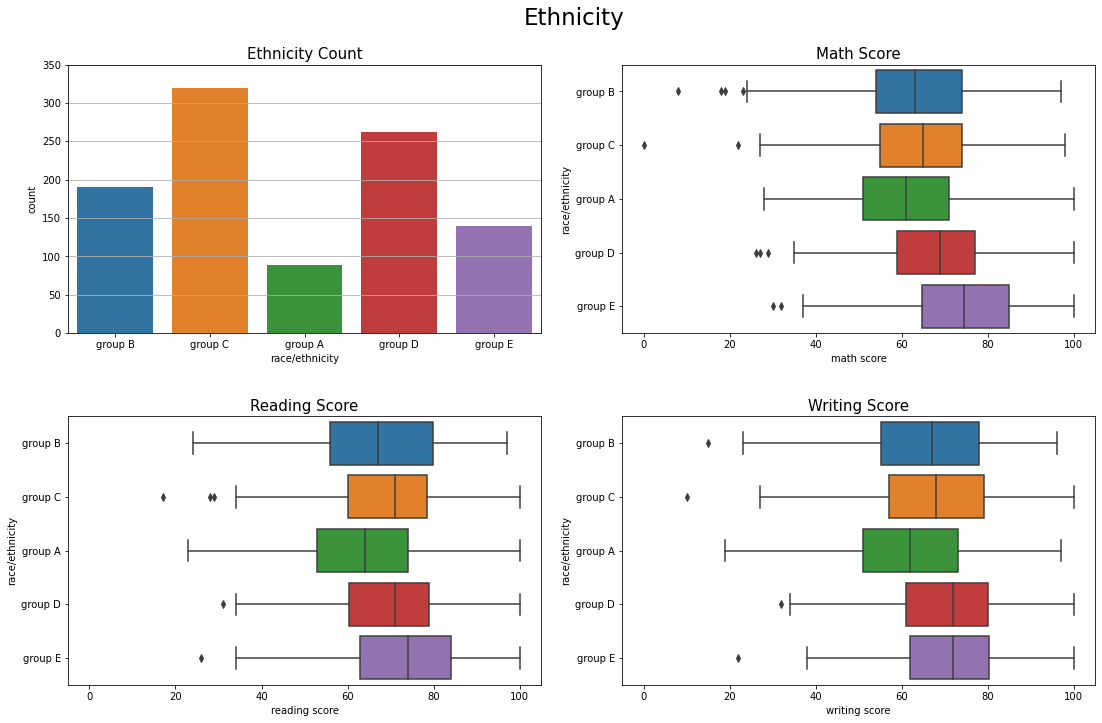

In [7]:
# Create Figure
fig, axs = plt.subplots(2,2, figsize=(15,10))
ax1, ax2, ax3, ax4 = axs.flatten()
fig.tight_layout(w_pad=5, h_pad=7)
fig.suptitle('Ethnicity', size=23)
plt.subplots_adjust(top=0.9)
 
# Ethnicity Countplot
sns.countplot(data=df, x='race/ethnicity', ax=ax1)
ax1.set_title('Ethnicity Count', size=15)
ax1.grid(b=True, which='major', axis='y')
ax1.set_ylim(0,350)

# Math Bloxplot
sns.boxplot(data=df, x='math score', y='race/ethnicity', ax=ax2)
ax2.set_title('Math Score', size=15)
ax2.set_xlim(-5,105)

# Reading Bloxplot
sns.boxplot(data=df, x='reading score', y='race/ethnicity', ax=ax3)
ax3.set_title('Reading Score', size=15)
ax3.set_xlim(-5,105)

# Writing Bloxplot
sns.boxplot(data=df, x='writing score', y='race/ethnicity', ax=ax4)
ax4.set_title('Writing Score', size=15)
ax4.set_xlim(-5,105)

plt.show()

The number of students varies widely according to the ethnicity. The groups with less students were A(89), E(140) and B(190) groups, which only represented 40% of the students, and the rest, belonged to C(319) and D(262) groups.

The performance of the ethnicities was very alike across the different subjects. The groups with more similarities on their mean scores and distributions were groups B, C and D, and groups A and E had more extreme values and displaced distributions. 

B, C and D groups had a range of mean scores between 63 and 71 points across the different subjects, their 25th percentile was always above the 55 points and the 75^th below the 80 points. Thus, on these ethnic groups, the majority of students passed the exam, as only approximately the 10th percentile of the students had an score below the 50 points. 

Group A obtained the lowest mean scores in all subjects and its distributions were displaced to lower values comparing to the other groups. The mean scores were between 61 and 64 points, its interquartile ranges (IQR) scarcely surpass the 50 points and the 75th percentile was approximately on the 70 points. In this case, the failed exams of the different subjects almost were 25% of the students and. 

Group E got the highest means in all subjects, and its IQR was always above 62 on the 25th percentile, and higher than 80 on the 75th. This students had the best performance across all exams, failing less than 10% of the exams and obtaining the best scores almost the 15% of the times. 

## Parental level of education

In [8]:
# Substitute longer values
df.loc[df['parental level of education']=='associate\'s degree', 'parental level of education'] = 'assoc. dgr'
df.loc[df['parental level of education']=='bachelor\'s degree', 'parental level of education'] = 'bach. dgr'
df.loc[df['parental level of education']=='master\'s degree', 'parental level of education'] = 'master dgr'
df.loc[df['parental level of education']=='some high school', 'parental level of education'] = 'some HS'
df.loc[df['parental level of education']=='high school', 'parental level of education'] = 'HS'
set(df['parental level of education'])

{'HS', 'assoc. dgr', 'bach. dgr', 'master dgr', 'some HS', 'some college'}

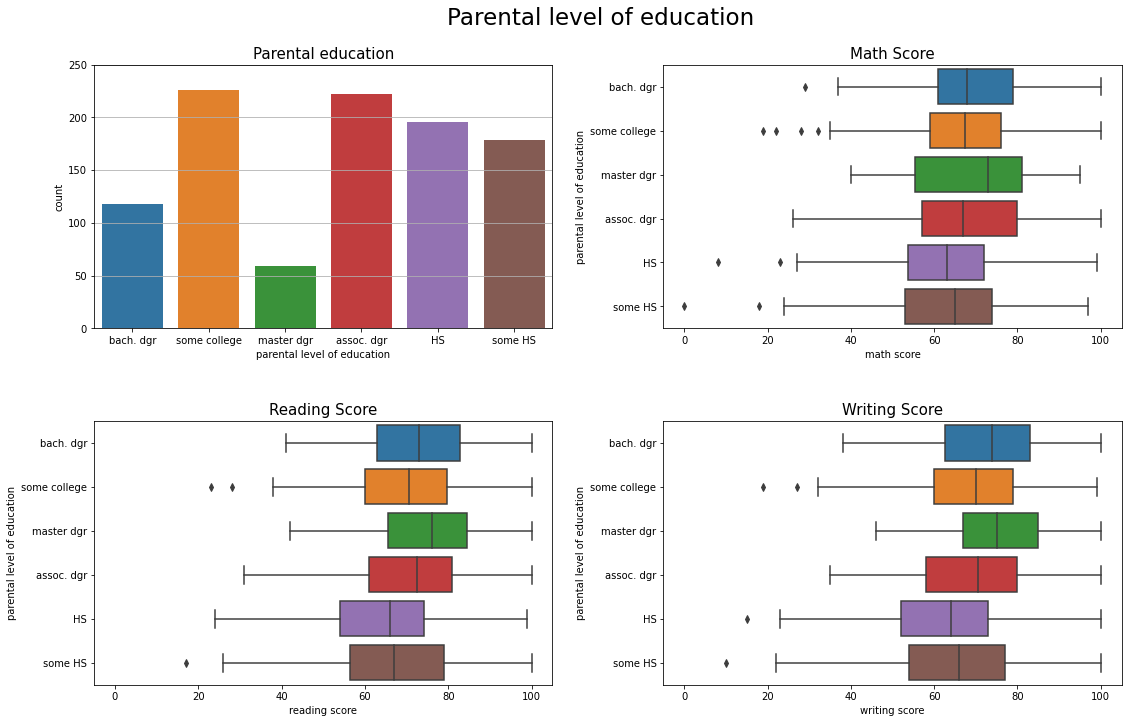

In [9]:
# Create Figure
fig, axs = plt.subplots(2,2, figsize=(15,10))
ax1, ax2, ax3, ax4 = axs.flatten()
fig.tight_layout(w_pad=8, h_pad=8)
fig.suptitle('Parental level of education', size=23)
plt.subplots_adjust(top=0.9)

# Parental education Countplot
sns.countplot(data=df, x='parental level of education', ax=ax1)
ax1.set_title('Parental education', size=15)
ax1.grid(b=True, which='major', axis='y')
ax1.set_ylim(0,250)

# Math Bloxplot
sns.boxplot(data=df, x='math score', y='parental level of education', ax=ax2)
ax2.set_title('Math Score', size=15)
ax2.set_xlim(-5,105)

# Reading Bloxplot
sns.boxplot(data=df, x='reading score', y='parental level of education', ax=ax3)
ax3.set_title('Reading Score', size=15)
ax3.set_xlim(-5,105)

# Writing Bloxplot
sns.boxplot(data=df, x='writing score', y='parental level of education', ax=ax4)
ax4.set_title('Writing Score', size=15)
ax4.set_xlim(-5,105)

plt.show()

The students' parental education goes from not finishing the High School to a Master's Degree. The parents who didn't go to college represent almost 40%, and even thogh all went to High School (HS), only half of them finished it. The other 60% is compoused by two subgroups. The first one, represent less than a third of the group, and includes the parents who obtained a bachelor or a master's degree. The second subgroup, is formed by the parents who obtained an associated degree or didn't finish any college course. Thus, the probability to have parents with high level of education is pretty low, as only a 17% of the parents obtained bachelor or master's degrees.

The parental education groups obtained more similar scores than the ethnic groups, however, the parental education also was very important on the overall performance. Students with a parental education of HS or less, obtained the worst performance. Their median was always 5 points below the other groups, as well as their IQR, nevertheless, in all the subjects were able to obtained the higher scores. Also need to be highlighted the higher probability to fail the exams compared to the other groups, as almost 25% of the students was below the 50 points.

Associate's degree parental group has a very similar behaviour to the HS groups. Even though their IQR is lower than the others college parental educations, it still was a little bit higher than HS groups

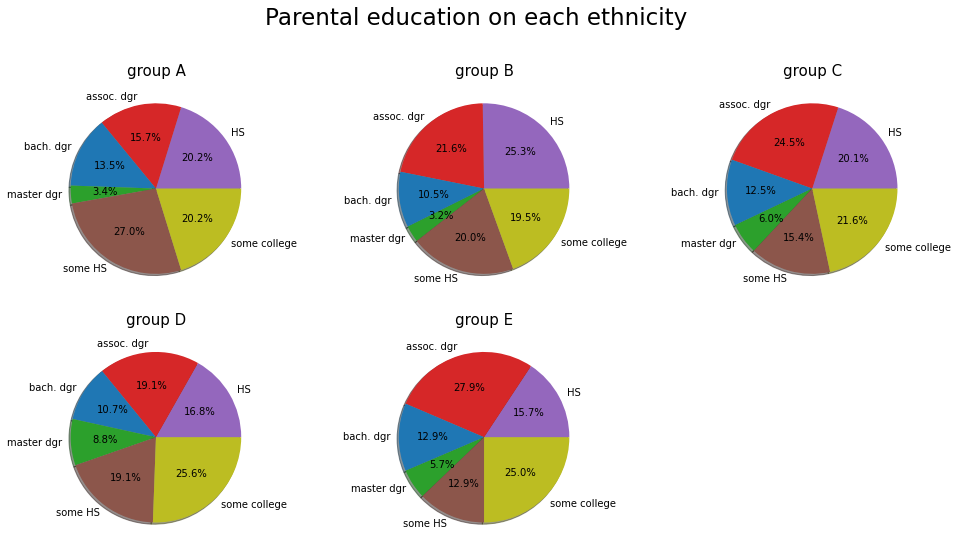

In [10]:
# Counts of ethnicity/parental education
df_cont = df.groupby(['race/ethnicity','parental level of education']).count().iloc[:,:1].reset_index()

# Create figure
fig, axs = plt.subplots(2,3, figsize=(13,8))
axis = axs.flatten()
fig.tight_layout(w_pad=7, h_pad=2)
fig.suptitle('Parental education on each ethnicity', size=23)
plt.subplots_adjust(top=0.85)

groups = ['group A', 'group B', 'group C', 'group D', 'group E']

# Fill pie plots
for ax, group in zip(axis, groups):
    df_group = df_cont.loc[df_cont['race/ethnicity'] == group]
    ax.pie(df_group ['gender'], autopct='%1.1f%%', shadow=True, labels=df_group['parental level of education'], 
           colors=['tab:purple', 'tab:red', 'tab:blue', 'tab:green', 'tab:brown', 'tab:olive'])

axis[-1].axis('off')

# Set titles
axis[0].set_title('group A', size=15) 
axis[1].set_title('group B', size=15) 
axis[2].set_title('group C', size=15)
axis[3].set_title('group D', size=15) 
axis[4].set_title('group E', size=15) 

plt.show()

## Lunch  

The variable lunch contains the kind of meals that the student ingested before the exams. The possible values are "free/reduced" and "standard".

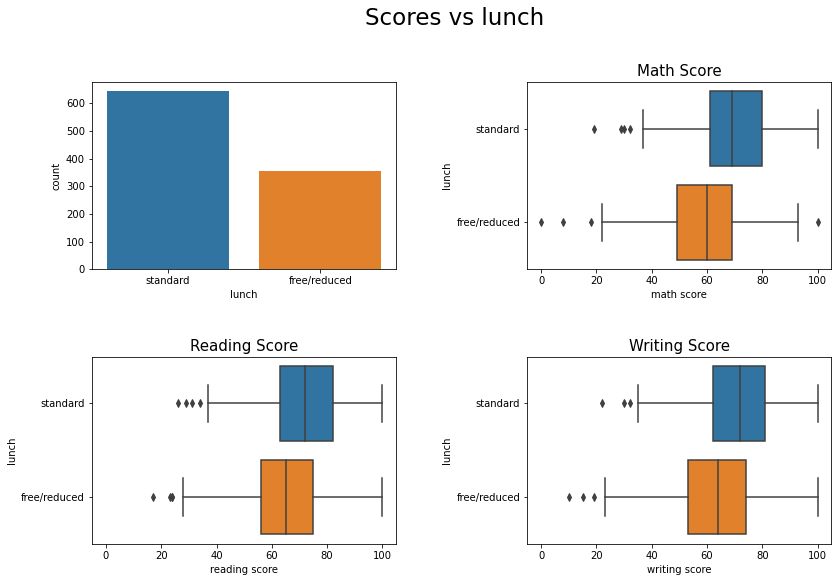

In [11]:
# Create figure
fig, axs = plt.subplots(2,2, figsize=(11,8))
ax1, ax2, ax3, ax4 = axs.flatten()
fig.tight_layout(w_pad=10, h_pad=8)
fig.suptitle('Scores vs lunch', size=23)
plt.subplots_adjust(top=0.85)

sns.countplot(data=df, x='lunch', ax=ax1)

# Math Bloxplot
sns.boxplot(data=df, x='math score', y='lunch', ax=ax2)
ax2.set_title('Math Score', size=15)
ax2.set_xlim(-5,105)

# Reading Bloxplot
sns.boxplot(data=df, x='reading score', y='lunch', ax=ax3)
ax3.set_title('Reading Score', size=15)
ax3.set_xlim(-5,105)

# Writing Bloxplot
sns.boxplot(data=df, x='writing score', y='lunch', ax=ax4)
ax4.set_title('Writing Score', size=15)
ax4.set_xlim(-5,105)

plt.show()

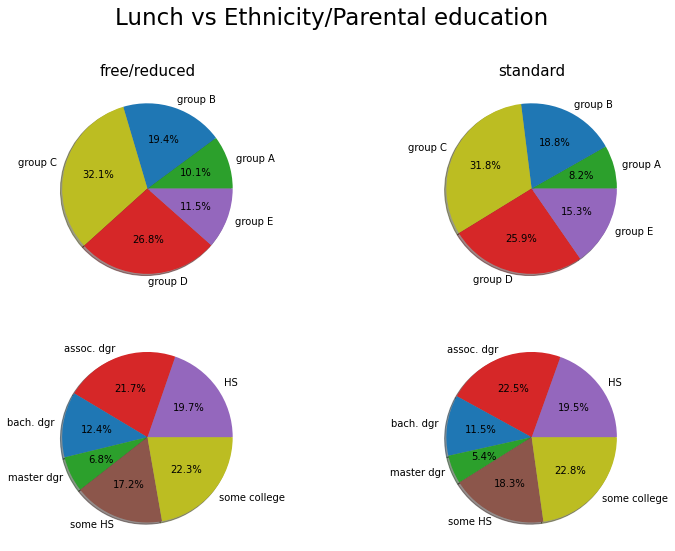

In [12]:
# Create figure
fig, axs = plt.subplots(2,2, figsize=(10,8))
axis = axs.flatten()
fig.tight_layout(w_pad=7, h_pad=2)
fig.suptitle('Lunch vs Ethnicity/Parental education', size=23)
plt.subplots_adjust(top=0.85)

# Counts of lunch vs ethnicity
df_cont = df.groupby(['lunch','race/ethnicity']).count().iloc[:,:1].reset_index()
groups = ['free/reduced', 'standard']

# Fill pie plots
for ax, group in zip([axis[0], axis[1]], groups):
    df_group = df_cont.loc[df_cont['lunch'] == group]
    ax.pie(df_group ['gender'], autopct='%1.1f%%', shadow=True, labels=df_group['race/ethnicity'], 
           colors=['tab:green', 'tab:blue', 'tab:olive', 'tab:red', 'tab:purple'])

# Counts lunch vs parental education
df_cont = df.groupby(['lunch','parental level of education']).count().iloc[:,:1].reset_index()
groups = ['free/reduced', 'standard']

# Fill pie plots
for ax, group in zip([axis[2], axis[3]], groups):
    df_group = df_cont.loc[df_cont['lunch'] == group]
    ax.pie(df_group ['gender'], autopct='%1.1f%%', shadow=True, labels=df_group['parental level of education'], 
           colors=['tab:purple', 'tab:red', 'tab:blue', 'tab:green', 'tab:brown', 'tab:olive'])

# Set titles
axis[0].set_title('free/reduced', size=15) 
axis[1].set_title('standard', size=15) 

plt.show()

## Test preparation course

In [13]:
set(df['test preparation course'])

{'completed', 'none'}

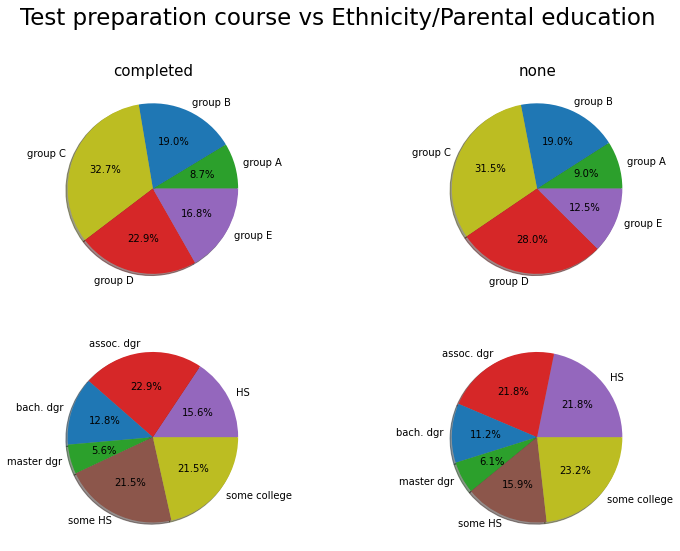

In [14]:
# Create figure
fig, axs = plt.subplots(2,2, figsize=(10,8))
axis = axs.flatten()
fig.tight_layout(w_pad=7, h_pad=2)
fig.suptitle('Test preparation course vs Ethnicity/Parental education', size=23)
plt.subplots_adjust(top=0.85)

# Counts of lunch vs ethnicity
df_cont = df.groupby(['test preparation course','race/ethnicity']).count().iloc[:,:1].reset_index()
groups = ['completed', 'none']

# Fill pie plots
for ax, group in zip([axis[0], axis[1]], groups):
    df_group = df_cont.loc[df_cont['test preparation course'] == group]
    ax.pie(df_group ['gender'], autopct='%1.1f%%', shadow=True, labels=df_group['race/ethnicity'], 
           colors=['tab:green', 'tab:blue', 'tab:olive', 'tab:red', 'tab:purple'])

# Counts lunch vs parental education
df_cont = df.groupby(['test preparation course','parental level of education']).count().iloc[:,:1].reset_index()
groups = ['completed', 'none']

# Fill pie plots
for ax, group in zip([axis[2], axis[3]], groups):
    df_group = df_cont.loc[df_cont['test preparation course'] == group]
    ax.pie(df_group ['gender'], autopct='%1.1f%%', shadow=True, labels=df_group['parental level of education'], 
           colors=['tab:purple', 'tab:red', 'tab:blue', 'tab:green', 'tab:brown', 'tab:olive'])

# Set titles
axis[0].set_title('completed', size=15) 
axis[1].set_title('none', size=15) 

plt.show()

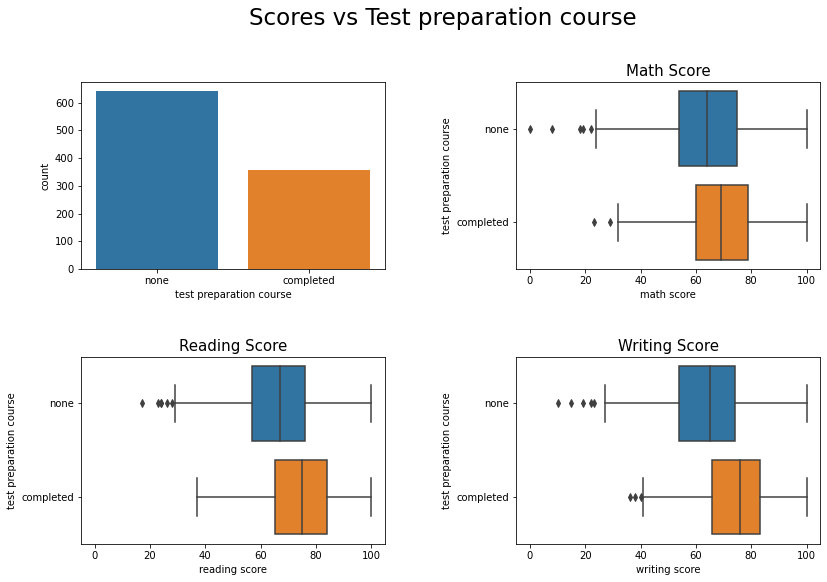

In [15]:
# Create figure
fig, axs = plt.subplots(2,2, figsize=(11,8))
ax1, ax2, ax3, ax4 = axs.flatten()
fig.tight_layout(w_pad=10, h_pad=8)
fig.suptitle('Scores vs Test preparation course', size=23)
plt.subplots_adjust(top=0.85)

sns.countplot(data=df, x='test preparation course', ax=ax1)

# Math Bloxplot
sns.boxplot(data=df, x='math score', y='test preparation course', ax=ax2)
ax2.set_title('Math Score', size=15)
ax2.set_xlim(-5,105)

# Reading Bloxplot
sns.boxplot(data=df, x='reading score', y='test preparation course', ax=ax3)
ax3.set_title('Reading Score', size=15)
ax3.set_xlim(-5,105)

# Writing Bloxplot
sns.boxplot(data=df, x='writing score', y='test preparation course', ax=ax4)
ax4.set_title('Writing Score', size=15)
ax4.set_xlim(-5,105)

plt.show()